In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
c=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\Retail_Sales_Capstone\Data\Raw\customers.csv")

In [3]:
c.head()

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.0,2024-07-11,South
1,C0001,Eric,Lee,Other,36.0,2020-09-20,East
2,C0002,Thomas,Pena,Female,NaN,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.0,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.0,2023-03-29,South


In [4]:
c.tail()

,customer_id,first_name,last_name,gender,age,signup_date,region
811,C0476,John,Le,Female,29.0,2022-11-23,West
812,C0059,Alison,Berger,Male,56.0,2020-11-16,West
813,C0600,Timothy,Cunningham,Male,39.0,2021-04-24,South
814,C0480,Matthew,Moore,Female,27.0,2020-05-23,South
815,C0515,Elizabeth,Alvarez,Other,46.0,2023-07-22,East


In [5]:
c.shape

(816, 7)

In [6]:
c.describe()

,age
count,776.000000
mean,44.074742
std,15.316349
min,18.000000
25%,31.000000
50%,44.000000
75%,58.000000
max,70.000000


In [7]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  816 non-null    object 
 1   first_name   816 non-null    object 
 2   last_name    816 non-null    object 
 3   gender       816 non-null    object 
 4   age          776 non-null    float64
 5   signup_date  816 non-null    object 
 6   region       816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [8]:
c.duplicated().sum()

np.int64(16)

In [9]:
c = c.drop_duplicates().reset_index(drop=True)

In [10]:
c.duplicated().sum()

np.int64(0)

In [11]:
c.isnull().sum()

customer_id     0
first_name      0
last_name       0
gender          0
age            40
signup_date     0
region          0
dtype: int64

In [12]:
c=c.fillna(value=c["age"].mean())
c.head()

,customer_id,first_name,last_name,gender,age,signup_date,region
0,C0000,Patrick,Morgan,Male,18.000000,2024-07-11,South
1,C0001,Eric,Lee,Other,36.000000,2020-09-20,East
2,C0002,Thomas,Pena,Female,44.155263,2021-03-07,East
3,C0003,Dalton,Duran,Male,24.000000,2021-08-29,South
4,C0004,Travis,Mcclain,Male,50.000000,2023-03-29,South


In [13]:
c.isnull().sum()

customer_id    0
first_name     0
last_name      0
gender         0
age            0
signup_date    0
region         0
dtype: int64

In [14]:
def get_age_group(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-55'
    elif age < 65:
        return '55-64'
    else:
        return '65-75'

c['Age_Group'] = c['age'].apply(get_age_group)
c

,customer_id,first_name,last_name,gender,age,signup_date,region,Age_Group
0,C0000,Patrick,Morgan,Male,18.000000,2024-07-11,South,18-24
1,C0001,Eric,Lee,Other,36.000000,2020-09-20,East,35-44
2,C0002,Thomas,Pena,Female,44.155263,2021-03-07,East,35-44
3,C0003,Dalton,Duran,Male,24.000000,2021-08-29,South,18-24
4,C0004,Travis,Mcclain,Male,50.000000,2023-03-29,South,45-55
...,...,...,...,...,...,...,...,...
795,C0795,Emily,Smith,Male,42.000000,2025-04-03,South,35-44
796,C0796,Jonathan,Gardner,Other,20.000000,2023-03-08,South,18-24
797,C0797,Jordan,Smith,Other,56.000000,2020-04-29,West,55-64
798,C0798,Rachel,Porter,Other,39.000000,2020-08-12,South,35-44


In [15]:
c.dtypes

customer_id     object
first_name      object
last_name       object
gender          object
age            float64
signup_date     object
region          object
Age_Group       object
dtype: object

In [16]:
c['age'] = pd.to_numeric(c['age'], errors='coerce')
c['age'] = c['age'].round()

In [17]:
c['customer_id']=c['customer_id'].astype("string")
c['first_name']=c['first_name'].astype("string")
c['last_name']=c['last_name'].astype("string")
c['gender']=c['gender'].astype("string")
c['age']=c['age'].astype("Int64")
c['signup_date']=pd.to_datetime(c['signup_date'])
c['region']=c['region'].astype("string")
c['Age_Group']=c['Age_Group'].astype("category")

In [18]:
c.dtypes

customer_id    string[python]
first_name     string[python]
last_name      string[python]
gender         string[python]
age                     Int64
signup_date    datetime64[ns]
region         string[python]
Age_Group            category
dtype: object

In [19]:
c.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'age',
       'signup_date', 'region', 'Age_Group'],
      dtype='object')

In [20]:
c.to_csv('Customers_Cleaned.csv',index=False)

In [21]:
p=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\Retail_Sales_Capstone\Data\Raw\products.csv")

In [22]:
p.head()

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35


In [23]:
p.tail()

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
1219,P0998,BrandB Stuff,Personal Care,BrandD,13.87,19.62,29.31
1220,P0684,BrandA Hear,Home & Kitchen,BrandC,161.31,222.84,27.61
1221,P0498,BrandD South,Personal Care,BrandD,19.73,35.81,44.90
1222,P1016,BrandA Watch,Electronics,BrandC,186.81,321.00,41.80
1223,P0188,BrandA Strong,Apparel,BrandB,172.73,302.59,42.92


In [24]:
p.describe()

,cost_price,unit_price,margin_pct
count,1224.000000,1224.000000,1224.000000
mean,103.030016,159.559428,33.869158
std,55.981671,90.679397,11.267576
min,5.290000,6.770000,9.120000
25%,54.697500,83.887500,25.397500
50%,104.490000,157.590000,36.260000
75%,151.342500,226.220000,43.135000
max,199.470000,382.320000,49.990000


In [25]:
p.shape

(1224, 7)

In [26]:
p.info

<bound method DataFrame.info of      product_id           product_name        category   brand  cost_price  \
0         P0000        BrandA Shoulder     Electronics  BrandC       52.75   
1         P0001  BrandA Responsibility     Electronics  BrandD       11.20   
2         P0002           BrandB Small     Electronics  BrandB      144.62   
3         P0003        BrandD Continue         Apparel  BrandD      119.91   
4         P0004          BrandA Indeed         Apparel  BrandD       71.35   
...         ...                    ...             ...     ...         ...   
1219      P0998           BrandB Stuff   Personal Care  BrandD       13.87   
1220      P0684            BrandA Hear  Home & Kitchen  BrandC      161.31   
1221      P0498           BrandD South   Personal Care  BrandD       19.73   
1222      P1016           BrandA Watch     Electronics  BrandC      186.81   
1223      P0188          BrandA Strong         Apparel  BrandB      172.73   

      unit_price  margin_pct  


In [27]:
p.duplicated().sum()

np.int64(24)

In [28]:
p = p.drop_duplicates().reset_index(drop=True)

In [29]:
p.duplicated().sum()

np.int64(0)

In [30]:
p.isnull().sum()

product_id       0
product_name     0
category         0
brand           60
cost_price       0
unit_price       0
margin_pct       0
dtype: int64

In [31]:
p['brand'] = p['brand'].fillna('Unknown')

In [32]:
p.head()

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35


In [33]:
p.isnull().sum()

product_id      0
product_name    0
category        0
brand           0
cost_price      0
unit_price      0
margin_pct      0
dtype: int64

In [34]:
p.dtypes

product_id       object
product_name     object
category         object
brand            object
cost_price      float64
unit_price      float64
margin_pct      float64
dtype: object

In [35]:
p['product_id']=p['product_id'].astype("string")
p['product_name']=p['product_name'].astype("string")
p['category']=p['category'].astype("string")
p['brand']=p['brand'].astype("string")

In [36]:
p.dtypes

product_id      string[python]
product_name    string[python]
category        string[python]
brand           string[python]
cost_price             float64
unit_price             float64
margin_pct             float64
dtype: object

In [37]:
p.to_csv('Products_Cleaned.csv',index=False)

In [38]:
r=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\Retail_Sales_Capstone\Data\Raw\returns.csv")

In [39]:
r.head()

,return_id,order_id,return_date,return_reason
0,R0000,O02237,2024-03-05,Defective
1,R0001,O01700,2025-03-18,Defective
2,R0002,O01451,2025-02-18,Late Delivery
3,R0003,O02759,2023-10-26,Defective
4,R0004,O00415,2024-08-06,No Longer Needed


In [40]:
r.tail()

,return_id,order_id,return_date,return_reason
199,R0199,O01305,2025-01-26,No Longer Needed
200,R0182,O00585,2024-08-24,Late Delivery
201,R0156,O01596,2024-01-27,No Longer Needed
202,R0194,O00934,2024-09-09,Wrong Item
203,R0035,O02071,2023-08-10,Defective


In [41]:
r.describe()

,return_id,order_id,return_date,return_reason
count,204,204,204,204
unique,200,193,176,4
top,R0035,O00362,2023-08-10,Defective
freq,2,3,4,64


In [42]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   return_id      204 non-null    object
 1   order_id       204 non-null    object
 2   return_date    204 non-null    object
 3   return_reason  204 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [43]:
r.shape

(204, 4)

In [44]:
r.duplicated().sum()

np.int64(4)

In [45]:
r = r.drop_duplicates().reset_index(drop=True)

In [46]:
r.duplicated().sum()

np.int64(0)

In [47]:
r.isnull().sum()

return_id        0
order_id         0
return_date      0
return_reason    0
dtype: int64

In [48]:
r.dtypes

return_id        object
order_id         object
return_date      object
return_reason    object
dtype: object

In [49]:
r['return_id']=r['return_id'].astype("string")
r['order_id']=r['order_id'].astype("string")
r['return_date']=pd.to_datetime(r['return_date'])
r['return_reason']=r['return_reason'].astype("string")

In [50]:
r.dtypes

return_id        string[python]
order_id         string[python]
return_date      datetime64[ns]
return_reason    string[python]
dtype: object

In [51]:
r.to_csv('Returns_Cleaned.csv',index=False)

In [52]:
s=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\Retail_Sales_Capstone\Data\Raw\sales_data.csv")

In [53]:
s.head()

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,1/31/2024,C0125,P1086,NaN,Online,2.0,80.63,0.05,153.20
1,O00001,9/29/2024,C0633,P0973,S042,In-Store,20.0,209.16,0.05,3974.00
2,O00002,8/29/2023,C0653,P0659,NaN,Online,2.0,218.60,0.10,393.48
3,O00003,5/13/2024,C0753,P0666,S014,In-Store,1.0,78.53,0.20,62.82
4,O00004,7/22/2024,C0627,P0166,S017,In-Store,1.0,344.93,0.20,275.94


In [54]:
s.tail()

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
3055,O02044,9/26/2024,C0580,P0886,S024,In-Store,2.0,82.92,0.00,165.84
3056,O02352,11/16/2023,C0632,P0091,S034,In-Store,1.0,27.29,0.10,24.56
3057,O02014,6/25/2023,C0127,P0296,NaN,Online,3.0,34.89,0.00,104.67
3058,O01371,2/12/2025,C0741,P1056,NaN,Online,1.0,57.51,0.05,54.63
3059,O00797,3/27/2025,C0479,P0659,NaN,Online,10.0,218.60,0.10,1967.40


In [55]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       3060 non-null   object 
 1   order_date     3060 non-null   object 
 2   customer_id    3060 non-null   object 
 3   product_id     3060 non-null   object 
 4   store_id       2068 non-null   object 
 5   sales_channel  3060 non-null   object 
 6   quantity       3060 non-null   float64
 7   unit_price     3060 non-null   float64
 8   discount_pct   3060 non-null   float64
 9   total_amount   3060 non-null   float64
dtypes: float64(4), object(6)
memory usage: 239.2+ KB


In [56]:
s.describe()

,quantity,unit_price,discount_pct,total_amount
count,3060.000000,3060.000000,3060.000000,3060.000000
mean,1.816340,160.494961,0.088056,272.423582
std,1.749869,91.106112,0.074714,411.177912
min,1.000000,6.770000,0.000000,6.970000
25%,1.000000,83.700000,0.050000,107.467500
50%,2.000000,161.170000,0.050000,196.580000
75%,2.000000,229.100000,0.200000,337.460000
max,30.000000,382.320000,0.200000,8855.800000


In [57]:
s.shape

(3060, 10)

In [58]:
s.duplicated().sum()

np.int64(60)

In [59]:
s=s.drop_duplicates().reset_index(drop=True)

In [60]:
s.duplicated().sum()

np.int64(0)

In [61]:
s.isnull().sum()

order_id           0
order_date         0
customer_id        0
product_id         0
store_id         968
sales_channel      0
quantity           0
unit_price         0
discount_pct       0
total_amount       0
dtype: int64

In [62]:
s['store_id']=s['store_id'].fillna('-')

In [63]:
s.isnull().sum()

order_id         0
order_date       0
customer_id      0
product_id       0
store_id         0
sales_channel    0
quantity         0
unit_price       0
discount_pct     0
total_amount     0
dtype: int64

In [64]:
s.head()

,order_id,order_date,customer_id,product_id,store_id,sales_channel,quantity,unit_price,discount_pct,total_amount
0,O00000,1/31/2024,C0125,P1086,-,Online,2.0,80.63,0.05,153.20
1,O00001,9/29/2024,C0633,P0973,S042,In-Store,20.0,209.16,0.05,3974.00
2,O00002,8/29/2023,C0653,P0659,-,Online,2.0,218.60,0.10,393.48
3,O00003,5/13/2024,C0753,P0666,S014,In-Store,1.0,78.53,0.20,62.82
4,O00004,7/22/2024,C0627,P0166,S017,In-Store,1.0,344.93,0.20,275.94


In [65]:
s.dtypes

order_id          object
order_date        object
customer_id       object
product_id        object
store_id          object
sales_channel     object
quantity         float64
unit_price       float64
discount_pct     float64
total_amount     float64
dtype: object

In [66]:
s['order_id']=s['order_id'].astype("string")
s['order_date']=pd.to_datetime(s['order_date'])
s['customer_id']=s['customer_id'].astype("string")
s['product_id']=s['product_id'].astype("string")
s['store_id']=s['store_id'].astype("string")
s['sales_channel']=s['sales_channel'].astype("string")
s['quantity']=s['quantity'].astype("Int64")

In [67]:
s.dtypes

order_id         string[python]
order_date       datetime64[ns]
customer_id      string[python]
product_id       string[python]
store_id         string[python]
sales_channel    string[python]
quantity                  Int64
unit_price              float64
discount_pct            float64
total_amount            float64
dtype: object

In [70]:
s=s.merge(p[["product_id","cost_price"]],on="product_id",how="left")
s["profit"]=(s["total_amount"]-(s["cost_price"]*s["quantity"]))

In [71]:
s["profit"]=s["profit"].astype('float')

In [72]:
s.reset_index(drop=True,inplace=True)

In [73]:
s.to_csv('Sales_Cleaned.csv',index=False)

In [74]:
st=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\Project\Retail_Sales_Capstone\Data\Raw\stores.csv")

In [75]:
st

,store_id,store_name,store_type,region,city,operating_cost
0,S000,Vincent Inc Store,Franchise,West,Chicago,62538.56
1,S001,Wilson Inc Store,Flagship,East,Chicago,26957.43
2,S002,Washington-Trujillo Store,Franchise,North,Los Angeles,66101.63
3,S003,Santana and Sons Store,Franchise,South,Phoenix,71089.40
4,S004,Oconnor-Rhodes Store,Franchise,East,Los Angeles,40965.26
...,...,...,...,...,...,...
56,S056,"Johnson, Sims and Miles Store",Mall Kiosk,East,Los Angeles,75869.37
57,S057,"Crawford, Spencer and Lopez Store",Franchise,West,Houston,52756.63
58,S058,Hubbard-Thomas Store,Mall Kiosk,East,New York,10215.93
59,S059,"Foster, Gutierrez and Li Store",Franchise,West,Los Angeles,11797.63


In [76]:
st.head()

,store_id,store_name,store_type,region,city,operating_cost
0,S000,Vincent Inc Store,Franchise,West,Chicago,62538.56
1,S001,Wilson Inc Store,Flagship,East,Chicago,26957.43
2,S002,Washington-Trujillo Store,Franchise,North,Los Angeles,66101.63
3,S003,Santana and Sons Store,Franchise,South,Phoenix,71089.40
4,S004,Oconnor-Rhodes Store,Franchise,East,Los Angeles,40965.26


In [77]:
st.tail()

,store_id,store_name,store_type,region,city,operating_cost
56,S056,"Johnson, Sims and Miles Store",Mall Kiosk,East,Los Angeles,75869.37
57,S057,"Crawford, Spencer and Lopez Store",Franchise,West,Houston,52756.63
58,S058,Hubbard-Thomas Store,Mall Kiosk,East,New York,10215.93
59,S059,"Foster, Gutierrez and Li Store",Franchise,West,Los Angeles,11797.63
60,S017,Robinson PLC Store,Flagship,East,Phoenix,47603.84


In [78]:
st.describe()

,operating_cost
count,61.000000
mean,40329.226721
std,19225.845475
min,10215.930000
25%,22350.490000
50%,39178.960000
75%,52756.630000
max,78806.300000


In [79]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store_id        61 non-null     object 
 1   store_name      61 non-null     object 
 2   store_type      61 non-null     object 
 3   region          61 non-null     object 
 4   city            61 non-null     object 
 5   operating_cost  61 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.0+ KB


In [80]:
st.shape

(61, 6)

In [81]:
st.duplicated().sum()

np.int64(1)

In [82]:
st=st.drop_duplicates().reset_index(drop=True)

In [83]:
st.duplicated().sum()

np.int64(0)

In [84]:
st.isnull().sum()

store_id          0
store_name        0
store_type        0
region            0
city              0
operating_cost    0
dtype: int64

In [85]:
st.dtypes

store_id           object
store_name         object
store_type         object
region             object
city               object
operating_cost    float64
dtype: object

In [86]:
st['store_id']=st['store_id'].astype("string")
st['store_name']=st['store_name'].astype("string")
st['store_type']=st['store_type'].astype("string")
st['region']=st['region'].astype("string")
st['city']=st['city'].astype("string")

In [87]:
st.dtypes

store_id          string[python]
store_name        string[python]
store_type        string[python]
region            string[python]
city              string[python]
operating_cost           float64
dtype: object

In [88]:
st.to_csv('Stores_Cleaned.csv',index=False)

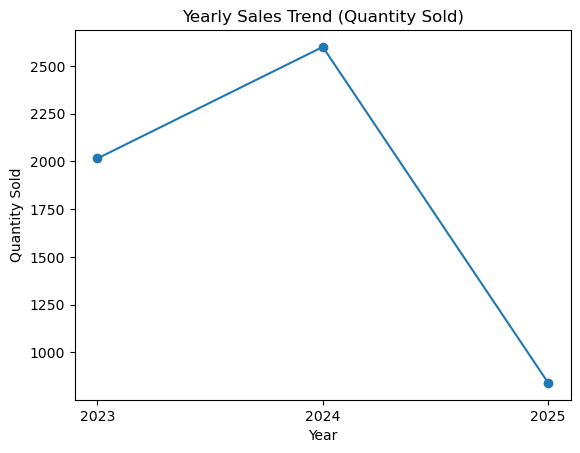

In [89]:
#Yearly sales trend(Quantity sold)
s['order_year']=s['order_date'].dt.to_period('Y')
yearly_sales = s.groupby('order_year')['quantity'].sum().reset_index()
yearly_sales['order_year']=yearly_sales['order_year'].astype('string')
plt.plot(yearly_sales['order_year'],yearly_sales['quantity'],marker='o')
plt.title('Yearly Sales Trend (Quantity Sold)')
plt.xlabel('Year')
plt.ylabel('Quantity Sold')
plt.show()

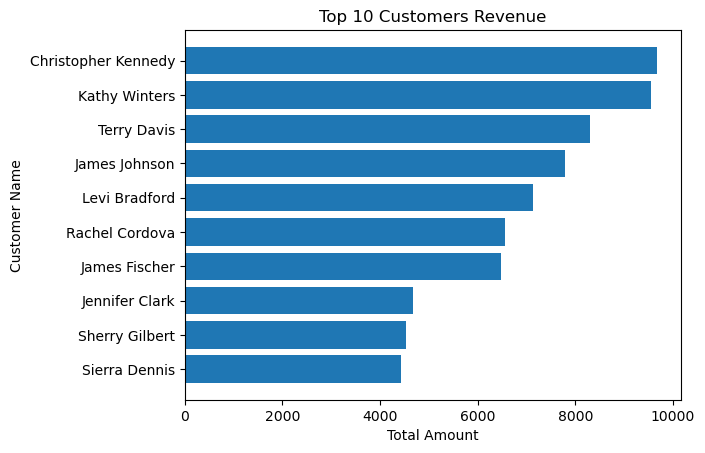

In [90]:
#Top 10 Customers Revenue 
df= s.merge(c,on='customer_id',how='left')
df['customer_name']=df['first_name']+' '+df['last_name']
top_customers=df.groupby(['customer_id','customer_name'])['total_amount'].sum().reset_index().sort_values('total_amount',ascending=False).head(10)
top_customers=top_customers.sort_values('total_amount')
plt.figure()
plt.barh(top_customers['customer_name'],top_customers['total_amount'])
plt.title("Top 10 Customers Revenue")
plt.xlabel("Total Amount")
plt.ylabel("Customer Name")
plt.show()